#  Applied Machine Learning 

## Homework 3: Preprocessing 


## Table of Contents

- [Instructions](#si)
- [Introduction](#in)
- [Exercise 1: Introducing the dataset](#1)
- [Exercise 2: Exploratory data analysis (EDA)](#2)
- [Exercise 3: Preprocessing](#3)
- [Exercise 4: Building models](#4)
- [Exercise 5: Evaluating on the test set](#5)

## Imports 

In [34]:
import tensorflow as tf

In [35]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import joblib
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Introduction <a name="in"></a>
<hr>

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a real-world dataset. 

<br><br>

## Exercise 1: Introducing the dataset <a name="1"></a>
<hr>

In this lab, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). Download the CSV and save it as `adult.csv` locally in this homework folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` in this folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [7]:
data  = pd.read_csv('adult.csv',sep=",")
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<br><br>

### 1.1 Data splitting 
rubric={points:4}

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**Your tasks:**

1. Split the data into `train_df` (60%) and `test_df` (40%) with `random_state = 42`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

_Usually having more data for training is a good idea. But here I'm using 60%/40% split because this is kind of a big dataset for a modest laptop. A smaller training data means it won't take too long to train the model on your laptop. A side advantage of this would be that with a bigger test split, we'll have a more reliable estimate of the deployment performance!_

In [8]:
train_df,test_df = train_test_split(data,test_size=0.4,random_state=42)

In [9]:
train_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
25823,36,Private,245521,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,35,Mexico,<=50K
10274,26,Private,134287,Assoc-voc,11,Never-married,Sales,Own-child,White,Female,0,0,35,United-States,<=50K
27652,25,Local-gov,109526,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,38,United-States,<=50K
13941,23,Private,131275,HS-grad,9,Never-married,Craft-repair,Own-child,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
31384,27,Private,193122,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,25,Private,410240,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
5390,51,Private,146767,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
860,55,Federal-gov,238192,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,1887,40,United-States,>50K
15795,41,Private,154076,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K


<br><br>

## Exercise 2: Exploratory data analysis (EDA) <a name="2"></a> 
<hr>

Let's examine our `train_df`. 

In [10]:
train_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
25823,36,Private,245521,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,35,Mexico,<=50K
10274,26,Private,134287,Assoc-voc,11,Never-married,Sales,Own-child,White,Female,0,0,35,United-States,<=50K
27652,25,Local-gov,109526,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,38,United-States,<=50K
13941,23,Private,131275,HS-grad,9,Never-married,Craft-repair,Own-child,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
31384,27,Private,193122,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,25,Private,410240,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
5390,51,Private,146767,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
860,55,Federal-gov,238192,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,1887,40,United-States,>50K
15795,41,Private,154076,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values as they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [11]:
train_df_nan = train_df.replace('?',np.nan)

In [12]:
(train_df_nan=='?').sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [13]:
test_df_nan = test_df.replace('?',np.nan)

The "?" symbols are now replaced with NaN values. 

<br><br>

### 2.1 Visualizing features
rubric={points:10}

**Your tasks:**

1. Examine the information given by `train_df_nan.info()` and `train_df_nan.describe()` methods. In case of `.describe()`, use the `include="all"` argument to show summary statistics of all  features.
2. Visualize the histograms of numeric features. 
3. From the visualizations, which features seem relevant for the given prediction task?

> Note: (Optional) If you're feeling excited about this you are welcome to use [`pandas_profiling`](https://github.com/pandas-profiling/pandas-profiling) for more elaborate visualization and EDA. 

<br><br>

In [14]:
train_df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19536 entries, 25823 to 23654
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19536 non-null  int64 
 1   workclass       18428 non-null  object
 2   fnlwgt          19536 non-null  int64 
 3   education       19536 non-null  object
 4   education.num   19536 non-null  int64 
 5   marital.status  19536 non-null  object
 6   occupation      18424 non-null  object
 7   relationship    19536 non-null  object
 8   race            19536 non-null  object
 9   sex             19536 non-null  object
 10  capital.gain    19536 non-null  int64 
 11  capital.loss    19536 non-null  int64 
 12  hours.per.week  19536 non-null  int64 
 13  native.country  19187 non-null  object
 14  income          19536 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.4+ MB


In [15]:
train_df_nan.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,19536.000000,18428,1.953600e+04,19536,19536.000000,19536,18424,19536,19536,19536,19536.000000,19536.000000,19536.000000,19187,19536
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,13570,NaN,6256,NaN,9025,2490,7937,16676,13079,NaN,NaN,NaN,17517,14841
mean,38.592547,NaN,1.892662e+05,NaN,10.084767,NaN,NaN,NaN,NaN,NaN,1090.443540,86.537162,40.532606,NaN,NaN
std,13.638971,NaN,1.049020e+05,NaN,2.580723,NaN,NaN,NaN,NaN,NaN,7449.700833,402.395668,12.406636,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.177670e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.782835e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.368860e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Text(0.5, 1.0, 'hours.per.week')

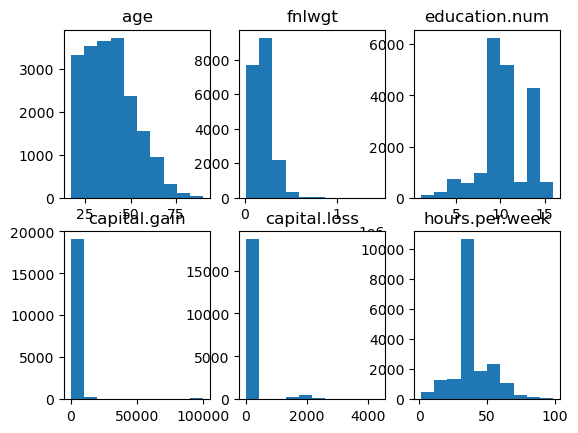

In [16]:

plt.subplot(2,3,1)
plt.hist(train_df_nan['age'])
plt.title('age')
plt.subplot(2,3,2)
plt.hist(train_df_nan['fnlwgt'])
plt.title('fnlwgt')
plt.subplot(2,3,3)
plt.hist(train_df_nan['education.num'])
plt.title('education.num')
plt.subplot(2,3,4)
plt.hist(train_df_nan['capital.gain'])
plt.title('capital.gain')
plt.subplot(2,3,5)
plt.hist(train_df_nan['capital.loss'])
plt.title('capital.loss')
plt.subplot(2,3,6)
plt.hist(train_df_nan['hours.per.week'])
plt.title('hours.per.week')

In [17]:
# seems like age,education.num are
#most relevant to predict the income

### 2.2 Identify transformations to apply
rubric={points:18}

**Your tasks:**
1. Identify the sequence of transformations that you would apply on each column in the dataset and fill in the table below accordingly. An example of the sequence of transformations to be applied on the `occupation` feature is shown in the table below. You may decide not to apply any transformations on a certain column or entirely drop a column from your model. That's totally fine. 
2. Are there common transformations you would like to apply on certain types of features? Identify different feature types for applying different transformations. In particular, fill in the lists below. 
3. Is including the `race` feature for predicting income ethically a good idea? Briefly discuss. 

> Note: This question is a bit open-ended and there is no single correct solution.

In [18]:
train_df_nan.isnull().sum()

age                  0
workclass         1108
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1112
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     349
income               0
dtype: int64

In [19]:
train_df_nan.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
25823,36,Private,245521,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,35,Mexico,<=50K
10274,26,Private,134287,Assoc-voc,11,Never-married,Sales,Own-child,White,Female,0,0,35,United-States,<=50K
27652,25,Local-gov,109526,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,38,United-States,<=50K
13941,23,Private,131275,HS-grad,9,Never-married,Craft-repair,Own-child,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
31384,27,Private,193122,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K


| Feature | Transformation |
| --- | ----------- |
| occupation | imputation, OHE |
| age | Scalling |
| workclass |imputation,OHE  |
| fnlwgt | scalling |
| education | drop |
| education.num | ordinal |
| marital.status | OHE |
| relationship |OHE  |
| race | OHE |
| sex |OHE  |
| capital.gain | scaling |
| capital.loss | scalling |
| hours.per.week | scalling  |
| native.country | imputation,OHE |


In [20]:
train_df.groupby(['race'])['income'].value_counts()

race                income
Amer-Indian-Eskimo  <=50K       167
                    >50K         22
Asian-Pac-Islander  <=50K       470
                    >50K        168
Black               <=50K      1644
                    >50K        228
Other               <=50K       144
                    >50K         17
White               <=50K     12416
                    >50K       4260
Name: income, dtype: int64

In [21]:
# not effecting the income when it comes to reces

<br><br>

### 2.3 Separating feature vectors and targets  
rubric={points:4}

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df_nan` and `test_df_nan`. 
2. At this point, if you train [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train` would it work? Why or why not?

In [22]:
X_train = train_df_nan.drop(columns=['income'])
y_train = train_df_nan['income']
X_test = test_df_nan.drop(columns=['income'])
y_test = test_df_nan['income']

In [23]:
svc = SVC()
svc.fit(X_train,y_test)

ValueError: could not convert string to float: 'Private'

<br><br><br><br>

## Exercise 3: Preprocessing <a name="3"></a>
<hr>

### 3.1 Preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`
rubric={points:18}

Let's carry out preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`. Note that you can define pipelines in two ways: 
- by using [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and explicitly providing named steps
- by using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline), which automatically names the steps in the pipeline with their class names. 

Similarly you can create a column transformer in two ways:
- by using [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- by using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) 

You may use the method of your choice but `make_pipeline` and `make_column_transformer` are highly recommended.  

**Your tasks:**

1. Create a column transformer `preprocessor` based on transformations you want to apply on the data from 2.2. 
2. Transform the data by calling `fit_transform` on the training set. What's the shape of the transformed data? 
3. Why do we need to use a column transformer in this case? Briefly explain. 

In [36]:
X_train



,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
25823,36,Private,245521,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,35,Mexico
10274,26,Private,134287,Assoc-voc,11,Never-married,Sales,Own-child,White,Female,0,0,35,United-States
27652,25,Local-gov,109526,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,38,United-States
13941,23,Private,131275,HS-grad,9,Never-married,Craft-repair,Own-child,Amer-Indian-Eskimo,Male,0,0,40,United-States
31384,27,Private,193122,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,25,Private,410240,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States
5390,51,Private,146767,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
860,55,Federal-gov,238192,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,1887,40,United-States
15795,41,Private,154076,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States


In [37]:
numeric =['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
categories =['workclass','marital.status','occupation','relationship','race','native.country']
binary = ['sex']




In [38]:
ct = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='most_frequent'),StandardScaler()),numeric),
    (make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown="ignore",sparse=False,dtype=int)),categories),
    (OneHotEncoder(drop='if_binary',handle_unknown="ignore"),binary)
)

In [39]:
ct

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education.num',
                                  'capital.gain', 'capital.loss',
                                  'hours.per.week']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['workclass', 'marital.status', 'occupation',
                                  'relationship', 'race', 'native.country']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['sex'])])

In [40]:
predata = ct.fit_transform(X_train)
predata.shape


C:\Users\pd846\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(19536, 88)

In [86]:
pre_testdata= ct.transform(X_test)


array([[-0.70333697,  0.8708525 , -0.03284691, ...,  0.        ,
         0.        ,  1.        ],
       [-1.43654887,  2.38812649, -0.03284691, ...,  0.        ,
         0.        ,  1.        ],
       [-0.77665816,  0.14745406, -0.03284691, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.26340983, -0.06481615,  0.35465138, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11676745,  0.42477714,  1.12964795, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02987493,  0.36540592, -0.42034519, ...,  0.        ,
         0.        ,  1.        ]])

In [41]:
column = numeric + ct.named_transformers_['pipeline-2'].get_feature_names_out().tolist() + ct.named_transformers_['onehotencoder'].get_feature_names_out(binary).tolist()
column

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'marital.status_Divorced',
 'marital.status_Married-AF-spouse',
 'marital.status_Married-civ-spouse',
 'marital.status_Married-spouse-absent',
 'marital.status_Never-married',
 'marital.status_Separated',
 'marital.status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'relationship_Husband',
 'relationship_Not-in-family',


<br><br><br><br>

In [42]:
predata_df = pd.DataFrame(predata,columns=column)
predata_df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,sex_Male
0,-0.190089,0.536275,-2.357837,-0.146378,-0.215060,-0.445951,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.923301,-0.524114,0.354651,-0.146378,-0.215060,-0.445951,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.996622,-0.760159,-0.420345,-0.146378,-0.215060,-0.204138,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.143264,-0.552827,-0.420345,-0.146378,-0.215060,-0.042930,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.849979,0.036757,-0.420345,-0.146378,-0.215060,-0.042930,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19531,-0.996622,2.106533,-0.420345,-0.146378,-0.215060,-0.042930,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
19532,0.909729,-0.405142,0.354651,-0.146378,-0.215060,-0.042930,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
19533,1.203014,0.466408,-0.420345,-0.146378,4.474474,-0.042930,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
19534,0.176517,-0.335466,-0.032847,-0.146378,-0.215060,0.763111,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [88]:
pre_testdata_df = pd.DataFrame(pre_testdata,columns=column)
pre_testdata_df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,sex_Male
0,-0.703337,0.870853,-0.032847,-0.146378,-0.21506,-0.042930,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.436549,2.388126,-0.032847,-0.146378,-0.21506,-2.058033,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.776658,0.147454,-0.032847,-0.146378,-0.21506,-0.042930,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.263410,-0.774792,-1.195342,-0.146378,-0.21506,0.360090,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.363228,-1.288037,-0.032847,-0.146378,-0.21506,-0.848971,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13020,0.616444,-0.756394,-0.420345,-0.146378,-0.21506,-0.687763,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13021,-0.263410,-0.140737,-0.420345,-0.146378,-0.21506,-0.042930,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13022,-0.263410,-0.064816,0.354651,-0.146378,-0.21506,0.279486,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13023,-0.116767,0.424777,1.129648,1.870399,-0.21506,0.763111,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Exercise 4: Building models <a name="4"></a>
<hr>

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Feel free to use it to keep track of your results if you like. 

<br><br>

### 4.1 Baseline model 
rubric={points:6}

**Your tasks:**
1. Define a pipeline with two steps: `preprocessor` from 3.1 and `scikit-learn`'s `DummyClassifier` with `strategy="prior"` as your classifier.  
2. Carry out 5-fold cross-validation with the pipeline. Store the results in `results_dict` above. Display the results as a pandas DataFrame.  

> You may use the function `mean_std_cross_val_scores` above to carry out cross-validation and storing results. Refer to the class notes if you are unsure about how to use it. 

In [43]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
25823,36,Private,245521,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,35,Mexico
10274,26,Private,134287,Assoc-voc,11,Never-married,Sales,Own-child,White,Female,0,0,35,United-States
27652,25,Local-gov,109526,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,38,United-States
13941,23,Private,131275,HS-grad,9,Never-married,Craft-repair,Own-child,Amer-Indian-Eskimo,Male,0,0,40,United-States
31384,27,Private,193122,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,25,Private,410240,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States
5390,51,Private,146767,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
860,55,Federal-gov,238192,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,1887,40,United-States
15795,41,Private,154076,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States


In [44]:
y_train

25823    <=50K
10274    <=50K
27652    <=50K
13941    <=50K
31384    <=50K
         ...  
29802    <=50K
5390      >50K
860       >50K
15795     >50K
23654    <=50K
Name: income, Length: 19536, dtype: object

In [45]:
pip = make_pipeline(ct,DummyClassifier(strategy='prior'))


In [46]:
pip.fit(X_train,y_train)

C:\Users\pd846\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(dtype=<class 'int'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'native.country']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['sex'])])),
                ('dummyclassifier', DummyClassifier())])

In [47]:
score = cross_validate(pip,X_train,y_train,cv=5,return_train_score=True)
dc = pd.DataFrame(score)

C:\Users\pd846\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pd846\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pd846\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pd846\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

In [48]:
dc

,fit_time,score_time,test_score,train_score
0,0.039868,0.012317,0.759724,0.759662
1,0.035012,0.012026,0.759662,0.759678
2,0.034347,0.011633,0.759662,0.759678
3,0.037047,0.010776,0.759662,0.759678
4,0.036011,0.011561,0.759662,0.759678


<br><br>

### 4.2 Trying different classifiers
rubric={points:14}

**Your tasks:**

1. For each of the models in the starter code below: 
    - Define a pipeline with two steps: `preprocessor` from 3.1 and the model as your classifier. 
    - Carry out 5-fold cross-validation with the pipeline.  
    - Store the results in `results_dict`. 
2. Display all the results so far as a pandas dataframe. 
3. Compare the train and validation accuracies and `fit` and `score` times in each case. How do the the validation accuracies compare to the baseline model from 4.1? Which model has the best validation accuracy? Which model is the fastest one?  

> Note that this might take a while to run.

> You may use the function above `mean_std_cross_val_scores` to carry out cross-validation and storing results. Refer to the class notes if you are unsure about how to use it. 

In [49]:
pip2 =make_pipeline(ct,SVC())
score2 = cross_validate(pip2,X_train,y_train,cv=5,return_train_score=True,verbose=3,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.7s remaining:   29.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.1s finished


In [50]:
svm = pd.DataFrame(score2)  
svm

,fit_time,score_time,test_score,train_score
0,9.364913,1.550128,0.848260,0.867353
1,9.620046,1.519113,0.858459,0.864227
2,9.452168,1.621891,0.854364,0.867298
3,9.611009,1.525382,0.852572,0.867234
4,9.522137,1.481867,0.857947,0.868258


In [51]:
pip3 = make_pipeline(ct,KNeighborsClassifier(n_neighbors=3))

In [52]:
score3 = cross_validate(pip3,X_train,y_train,cv=5,return_train_score=True)

C:\Users\pd846\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pd846\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pd846\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\pd846\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

In [53]:
knn = pd.DataFrame(score3)
knn

,fit_time,score_time,test_score,train_score
0,0.042136,0.361046,0.822927,0.901203
1,0.064834,0.383676,0.829793,0.898394
2,0.064124,0.470538,0.822626,0.901209
3,0.064429,0.456754,0.826721,0.901081
4,0.066589,0.398920,0.826465,0.896347


In [54]:
result_dict={
    'DC':dc['train_score'].mean(),
    'svc':svm['train_score'].mean(),
    "knn":knn['train_score'].mean()
}
result_dict
pd.Series(result_dict)

DC     0.759674
svc    0.866874
knn    0.899647
dtype: float64

<br><br>

### (optional) 4.3 Exploring importance of scaling
rubric={points:1}

In this exercise you'll examine whether scaling helps in case of KNNs and SVM RBFs. 

**Your tasks:**

1. Create a column transformer without the `StandardScaler` step for `numeric_features`. 
2. Repeat the steps in 4.2 with this new column transformer. 
3. Compare the results of scaled numeric features with unscaled numeric features. Is scaling necessary for decision trees? Why or why not?

### 4.4 Hyperparameter optimization
rubric={points:10}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. In practice you'll carry out hyperparameter optimization for all different hyperparameters for the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter: `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` in the starter code below: 
    - Create a pipeline object with two steps: preprocessor from 3.1 and `SVC` classifier with the value of `C`.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. 
2. Which hyperparameter value seems to be performing the best? Is it different than the default value for the hyperparameter used by `scikit-learn`? 

> Note: Running this might take a while. 

In [55]:
pip0 = make_pipeline(ct,SVC())

In [56]:
param_grid = {
    "svc__C":[0.01,0.1,1,10],
    'svc__gamma':[0.01,0.1,1,10]
}

In [57]:
grid = GridSearchCV(pip0,param_grid,cv=5,n_jobs=-1,return_train_score=True,verbose=3)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'education.num',
                                                                          'capital.gain',
                                                                          'capital.loss',
                                                                          'hours.per.week']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer'...
                                                                                          OneHotEncoder(dtype=<class 'int'>,
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['workclass',
                                                                          'marital.status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'native.country']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore'),
                                                                         ['sex'])])),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10],
                         'svc__gamma': [0.01, 0.1, 1, 10]},
             return_train_score=True, verbose=3)

In [46]:
grid.fit(X_train,y_train)

In [63]:
joblib.dump(grid,'svc_model.pkl')

In [58]:
svc_loaded = joblib.load('svc_model.pkl')

C:\Users\pd846\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator SimpleImputer from version 1.1.3 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\pd846\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\pd846\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator Pipeline from version 1.1.3 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For 

In [90]:
pd.DataFrame(svc_loaded.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
mean_fit_time,57.241131,58.293642,133.062641,184.982837,47.594389,45.675499,206.648463,264.978102,42.900506,47.984528,290.479674,313.331367,42.549372,60.260443,240.580074,236.173289
std_fit_time,3.093365,2.750407,8.019309,2.362447,2.278382,2.454403,2.742277,12.030814,5.263317,3.983273,30.00921,8.467428,2.537679,2.522222,15.351652,8.611502
mean_score_time,14.225169,14.213042,23.259576,24.941323,11.458757,9.942567,23.09185,29.897888,10.051251,11.155277,20.961347,23.758038,7.861494,11.114409,10.671995,9.96086
std_score_time,1.431625,2.336078,2.00916,2.504734,0.802746,1.132241,1.248526,3.758058,1.516204,0.875114,3.728692,4.781216,0.730384,0.923765,0.715618,0.668096
param_svc__C,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,1,1,1,1,10,10,10,10
param_svc__gamma,0.01,0.1,1,10,0.01,0.1,1,10,0.01,0.1,1,10,0.01,0.1,1,10
params,"{'svc__C': 0.01, 'svc__gamma': 0.01}","{'svc__C': 0.01, 'svc__gamma': 0.1}","{'svc__C': 0.01, 'svc__gamma': 1}","{'svc__C': 0.01, 'svc__gamma': 10}","{'svc__C': 0.1, 'svc__gamma': 0.01}","{'svc__C': 0.1, 'svc__gamma': 0.1}","{'svc__C': 0.1, 'svc__gamma': 1}","{'svc__C': 0.1, 'svc__gamma': 10}","{'svc__C': 1, 'svc__gamma': 0.01}","{'svc__C': 1, 'svc__gamma': 0.1}","{'svc__C': 1, 'svc__gamma': 1}","{'svc__C': 1, 'svc__gamma': 10}","{'svc__C': 10, 'svc__gamma': 0.01}","{'svc__C': 10, 'svc__gamma': 0.1}","{'svc__C': 10, 'svc__gamma': 1}","{'svc__C': 10, 'svc__gamma': 10}"
split0_test_score,0.765353,0.812948,0.759724,0.759724,0.834442,0.840328,0.778659,0.759724,0.845445,0.849284,0.82216,0.767912,0.851331,0.847748,0.811157,0.766633
split1_test_score,0.764781,0.813924,0.759662,0.759662,0.847709,0.854876,0.781674,0.759662,0.858459,0.859739,0.816483,0.765805,0.862554,0.855388,0.800358,0.764525
split2_test_score,0.765037,0.817251,0.759662,0.759662,0.840543,0.851293,0.782954,0.759662,0.853084,0.855132,0.819811,0.770668,0.85462,0.848989,0.805221,0.772204


In [62]:
svc_loaded.best_score_

0.855804897332793

In [63]:
svc_loaded.best_params_

{'svc__C': 10, 'svc__gamma': 0.01}

<br>

In [67]:
# pip01 =make_pipeline(ct,KNeighborsClassifier())
k_range = list(range(1, 31,2))
knn_params = dict(n_neighbors=k_range)

knn_grid2=GridSearchCV(KNeighborsClassifier(),knn_params,cv=5,verbose=3,n_jobs=-1,return_train_score=True)
knn_grid2

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29]},
             return_train_score=True, verbose=3)

In [68]:
knn_params

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}

In [69]:
knn_grid2.fit(predata_df,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29]},
             return_train_score=True, verbose=3)

In [71]:
joblib.dump(knn_grid2,'knn_model.pkl')

['knn_model.pkl']

In [73]:
knn_loaded = joblib.load('knn_model.pkl')

In [74]:
knn_grid2.best_score_

0.841625940265733

In [75]:
knn_grid2.best_params_

{'n_neighbors': 15}

In [77]:
pd.DataFrame(knn_grid2.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
mean_fit_time,0.047943,0.055352,0.039359,0.027448,0.070363,0.05872,0.034718,0.194473,0.078854,0.130774,0.059355,0.068231,0.209198,0.046865,0.048477
std_fit_time,0.0351,0.034233,0.020105,0.000882,0.049541,0.060747,0.007356,0.092977,0.101287,0.127285,0.049677,0.046877,0.233421,0.015846,0.022731
mean_score_time,2.273363,2.083005,2.505538,1.4607,1.829048,2.176542,2.434683,1.996195,2.640376,2.426198,2.723189,2.4816,2.479391,2.231931,2.152336
std_score_time,0.892061,0.656926,0.461324,0.038149,0.378209,0.314194,0.90504,0.484925,0.859066,0.590587,0.861524,0.442124,0.419151,0.378847,0.36518
param_n_neighbors,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29
params,{'n_neighbors': 1},{'n_neighbors': 3},{'n_neighbors': 5},{'n_neighbors': 7},{'n_neighbors': 9},{'n_neighbors': 11},{'n_neighbors': 13},{'n_neighbors': 15},{'n_neighbors': 17},{'n_neighbors': 19},{'n_neighbors': 21},{'n_neighbors': 23},{'n_neighbors': 25},{'n_neighbors': 27},{'n_neighbors': 29}
split0_test_score,0.798874,0.820368,0.829069,0.832395,0.829836,0.834954,0.834954,0.837257,0.836233,0.836233,0.836233,0.837001,0.837001,0.833675,0.833675
split1_test_score,0.797799,0.829025,0.836703,0.837471,0.839775,0.842846,0.839007,0.842078,0.84131,0.84259,0.84515,0.845918,0.845662,0.844126,0.844126
split2_test_score,0.806245,0.820067,0.830816,0.830816,0.835168,0.83568,0.837983,0.839263,0.844638,0.84259,0.842846,0.84259,0.84131,0.842846,0.843102
split3_test_score,0.799079,0.828257,0.830049,0.831328,0.838239,0.838751,0.843614,0.840287,0.837983,0.836447,0.835936,0.836447,0.838239,0.837215,0.835936


<br><br><br><br>

## Exercise 5: Evaluating on the test set <a name="5"></a>
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### 5.1 Scoring on the unseen test set 
rubric={points:10}

**Your tasks:**

1. Train the best performing model on the entire training set. 
2. Report the results of this model on `X_test`. 
3. Are the cross-validation results and test results consistent? 

In [84]:
Svc = SVC(C=10,gamma=0.01,verbose=3)
Svc.fit(predata_df,y_train)

[LibSVM]

SVC(C=10, gamma=0.01, verbose=3)

In [89]:
Svc.predict(pre_testdata_df)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [92]:
Svc.score(pre_testdata_df,y_test)

0.8537428023032629

In [ ]:
# silimar 

<br><br><br><br>

Congratulations on finishing the homework! This was a tricky one but I hope you are feeling good after working on it. You are now ready to build a simple supervised machine learning pipeline on real-world datasets! Well done :clap:! 

![](eva-well-done.png)

